<a href="https://colab.research.google.com/github/jamieth0405/MAT421_Project/blob/main/MAT421Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Regression and Logistic Regression Project**

## **Predicting Diabetes Using Multiple Regression**

Group Members: Gabriel Pascual, Jamie Dinh



### **Project Overview**

In this project, we build two models to study the relationships between health indicators and diabetic outcomes:

-  Multiple Linear Regression model to predict HbA1c levels, a key clinical measure of long-term blood sugar control.

- A Logistic Regression model to predict diabetes diagnosis directly as a binary outcome (0 = no diabetes, 1 = diabetes).

The dataset includes several medical predictor variables such as age, BMI, smoking history, and blood glucose levels. By applying both regression techniques, we aim to understand which factors most strongly influence blood sugar levels and the presence of diabetes.





### **Linear Regression in Healthcare Analytics**

Linear regression is a fundamental statistical technique used to model the relationship between a continuous dependent variable and one or more independent variables. In healthcare, it helps quantify how various risk factors contribute to health outcomes like HbA1c levels.

We use Multiple Linear Regression because we have multiple predictors potentially affecting HbA1c. Our independent variables include:

- Gender (female, male, or others)

- Age

- Hypertension (yes or no)

- Heart disease (yes or no)

- Smoking history

- Body Mass Index (BMI)

- Blood glucose level



### **Why We Also Use Logistic Regression**

Initially, we focused on predicting HbA1c with linear regression. However, we found that the model had a modest R² value (~0.16), meaning many factors affecting diabetes status might not be fully captured by HbA1c alone.

Thus, we additionally built a Logistic Regression model to predict diabetes diagnosis directly (binary classification). Logistic regression is appropriate because:

Diabetes is a categorical outcome (yes or no)

It models the probability of having diabetes given the risk factors

It allows evaluating prediction efficiency with accuracy, precision, recall, and AUC


### **Why HbA1c?**

HbA1c reflects the average blood glucose level over the past 2–3 months and is considered a gold standard in diabetes diagnosis and monitoring. Unlike a binary diabetes diagnosis, predicting HbA1c provides deeper insight into disease progression and patient risk profiles.

### **Multiple Linear Regression Model**

Multiple Linear Regression extends the simple linear regression model to incorporate multiple independent variables. The relationship between the dependent variable (Y) and independent variables (X₁, X₂,..., Xₙ) is modeled as:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

Where:

- Y is the dependent variable (HbA1c level)

- X₁ to Xₙ are the independent variables (health indicators)

- β₀ is the y-intercept (constant term)

- β₁ to βₙ are the coefficients for each independent variable

- ε represents the error term

The model parameters (β₀ to βₙ) are estimated using the Ordinary Least Squares (OLS) method, which minimizes the sum of squared differences between observed and predicted values.



### **Clinical Significance**

Diabetes prediction models have important clinical applications, including:

- Early identification of at-risk individuals or poor glucose control

- Targeted prevention strategies

- Resource allocation for screening programs

- Support for personalized treatment plans

By analyzing how different health metrics contribute to elevated HbA1c, healthcare providers can develop more effective interventions and help patients understand their modifiable risk factors.

### **Performance Evaluation**

To assess the model's performance, we use several evaluation metrics:

- Mean Squared Error (MSE) for Multiple Regression: Measures the average squared difference between actual and predicted values

- R-squared (R²) for Multiple Regression: Represents the proportion of variance in HbA1c level explained by the model

- Coefficient Analysis: Helps interpret the relative importance of each predictor variable

- Confusion Matrix for Logistic Regression: Helps compare the predicted classes to the observed outcomes

- Precision-Recall for Logistic Regression: Focuses on the bias-variance tradeoff between precision and recall

### **Software Information**

This project was developed using Python 3.11.12 in Google Colab. Key libraries include pandas, numpy, matplotlib, scikit-learn, and seaborn for data handling, machine learning, and visualization.


### **Python Libraries and Importing Data**

For our project, we create a multiple linear regression model to predict the presence and progression of our dependent variable, HbA1c (hemoglobin levels), by using multiple independent variables.  We use the pandas, numpy, and scikit-learn libraries for data handling/machine learning and visualization. Various statistical metrics are also used for evaluating model performance and utility.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
# Load data
df = pd.read_csv('diabetes_prediction_dataset.csv', encoding='latin1')

print('Shape: ', df.shape)

df.head()

Shape:  (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


###**Data Cleaning and Pre-Processing**

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


###**Exploratory Data Analysis**
Each independent variable is graphed to examine their distributions, identify outliers, and understand the overall behavior of the data. BMI appears to be normal/symmetric about a mean of 30. The variables hypertension, heart_disease, and diabetes have less presence within the data.

<ipython-input-6-78043e858eb1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax1, bins=20);


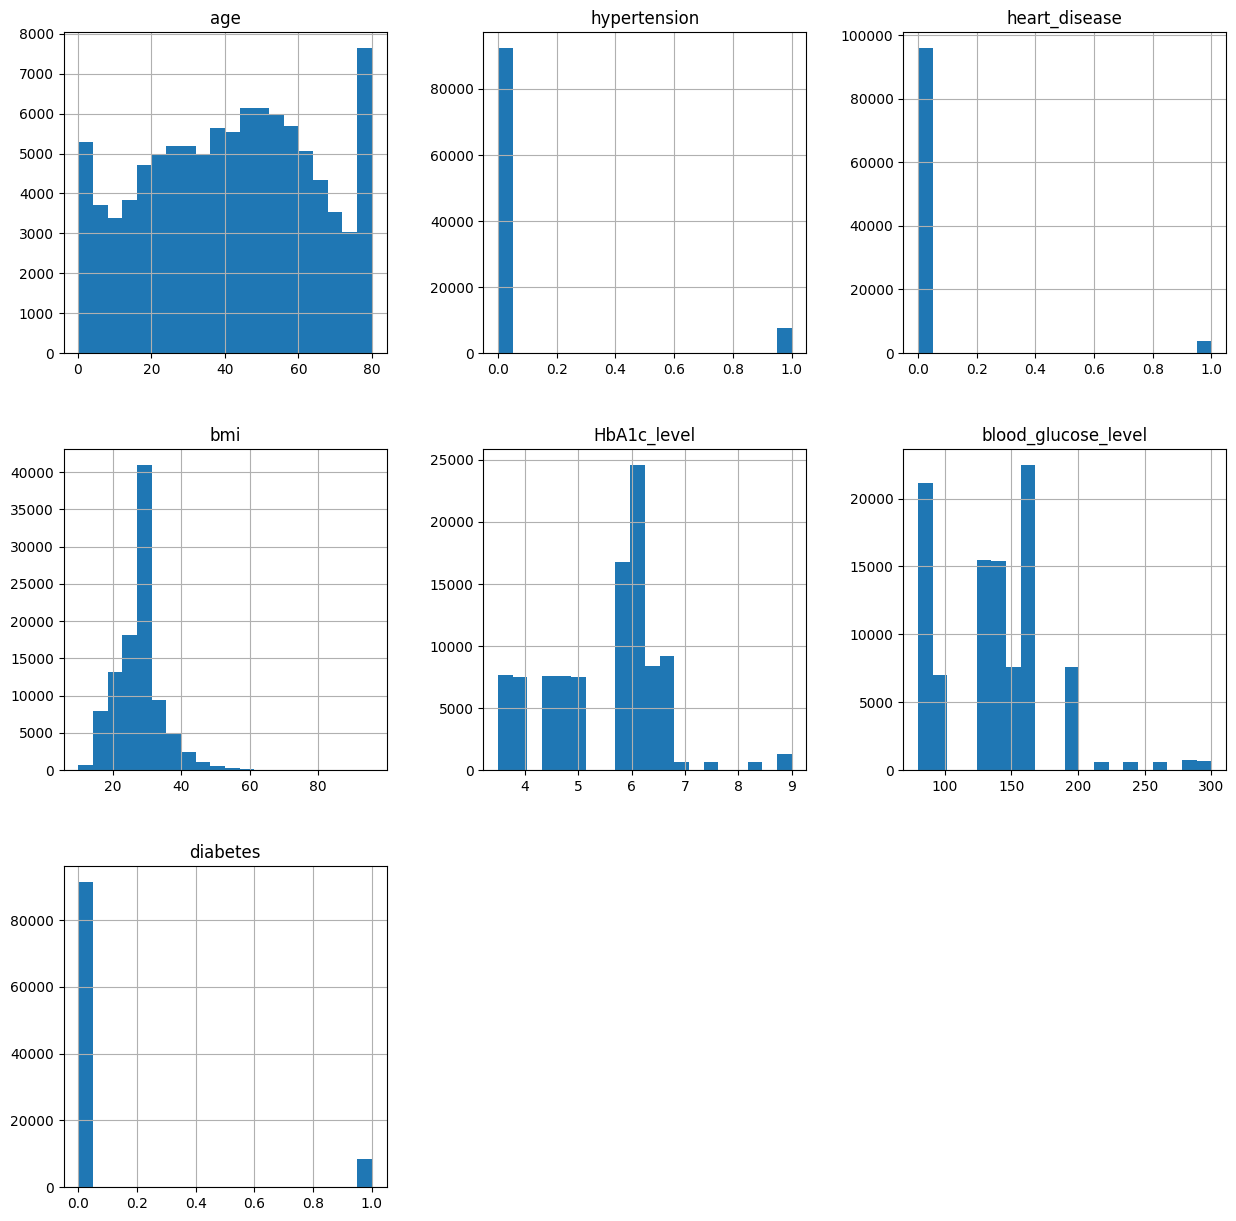

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,15))

df.hist(ax=ax1, bins=20);

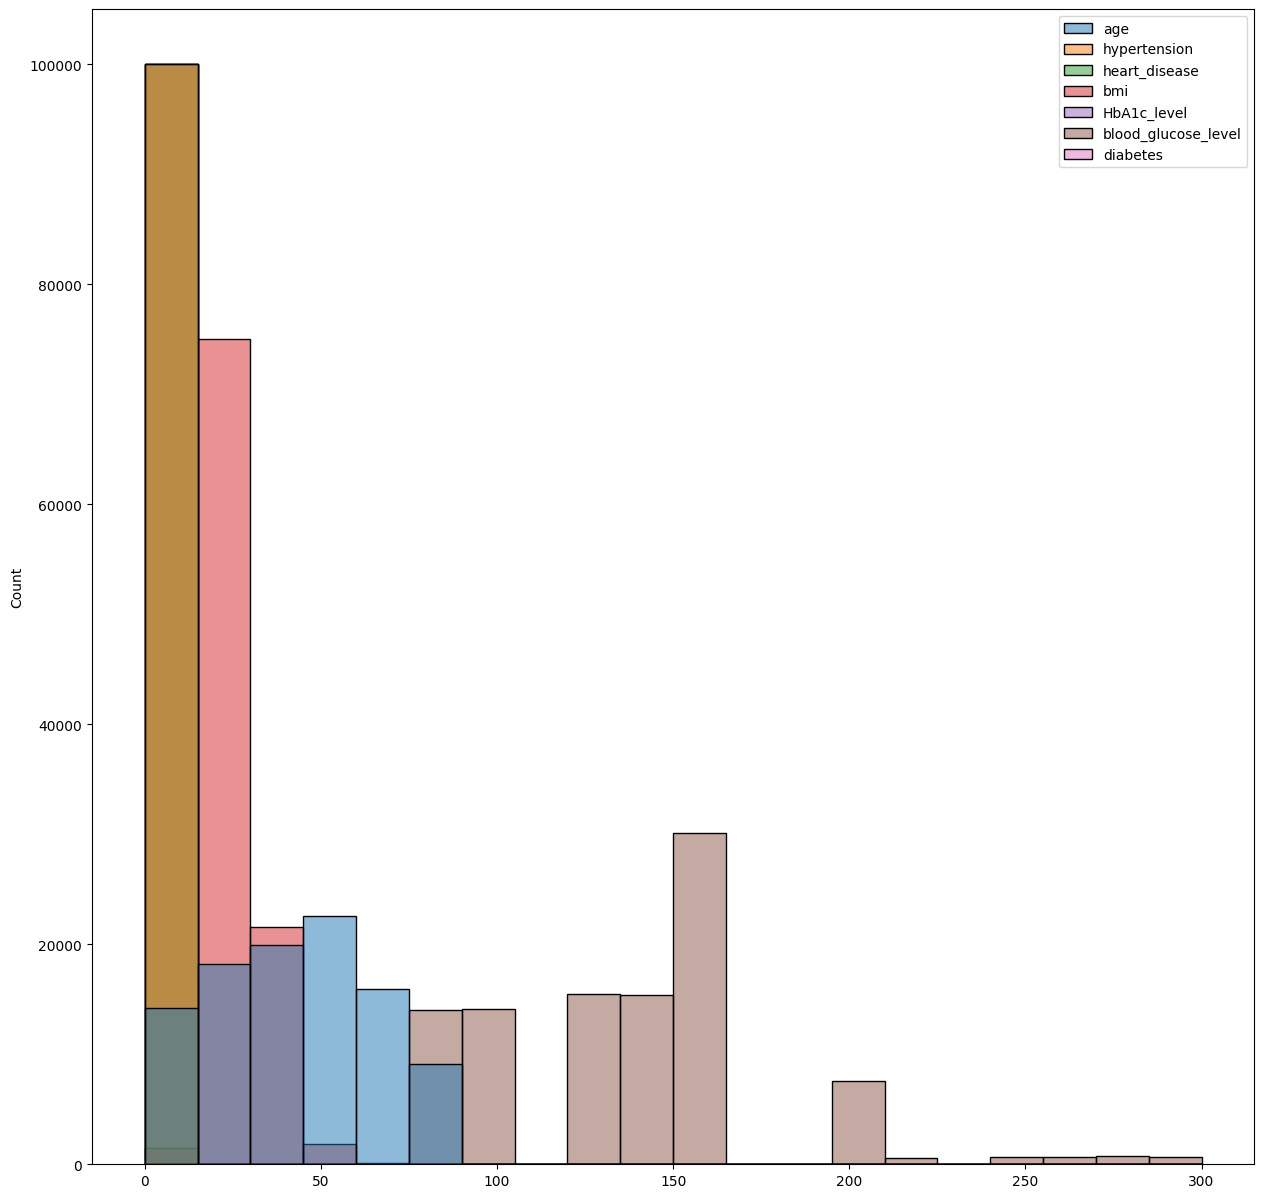

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,15))

sns.histplot(df, ax=ax1, bins=20);

In [ ]:
print(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


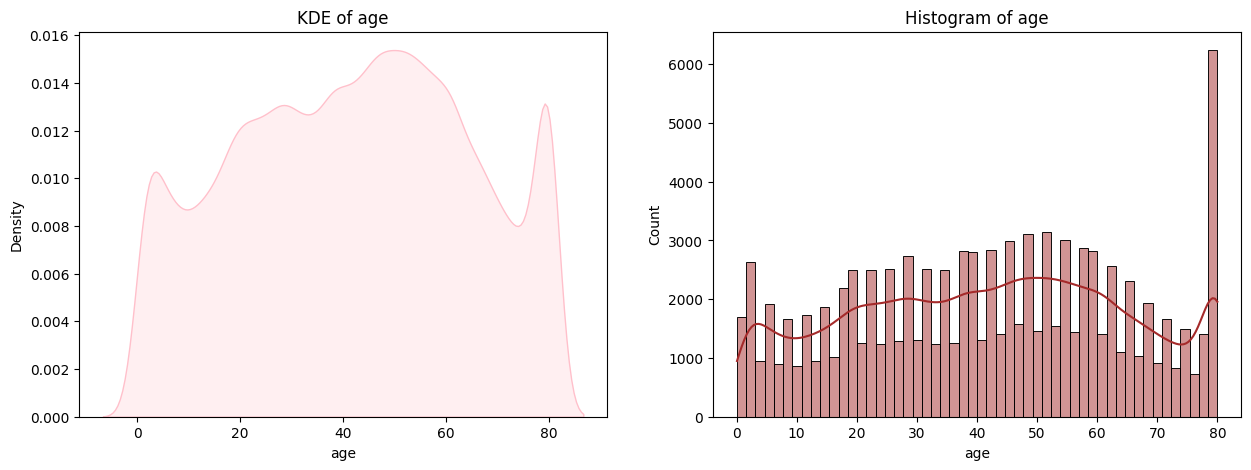

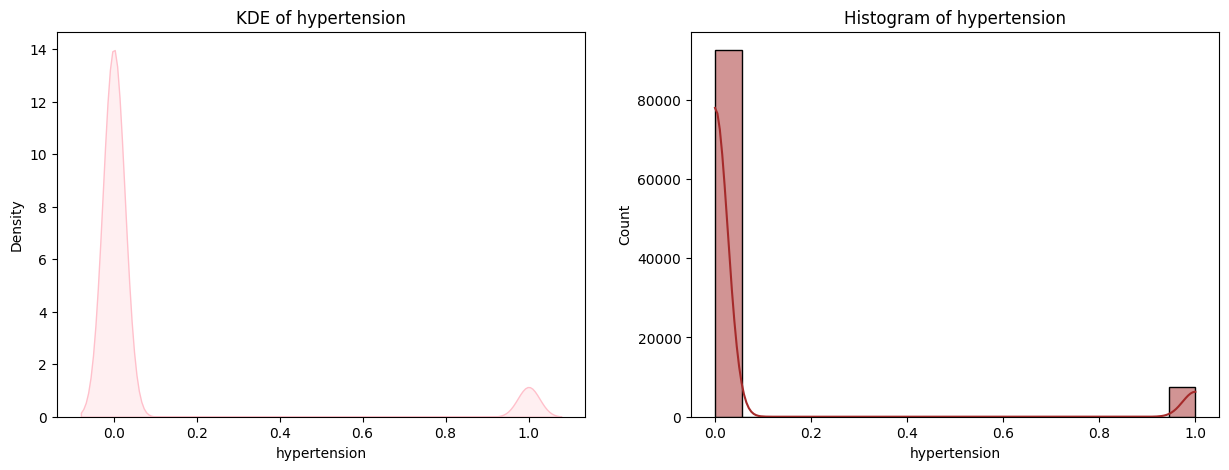

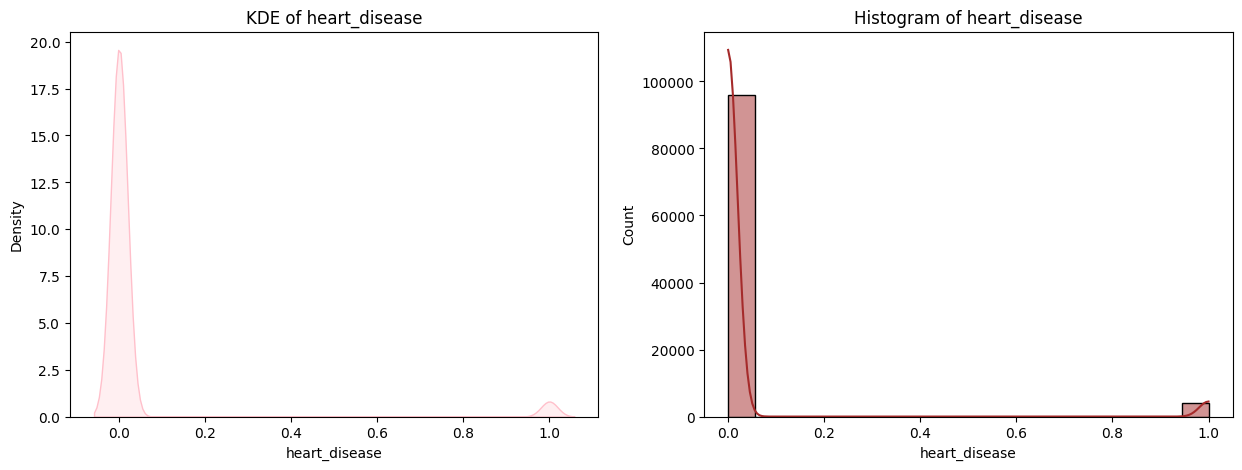

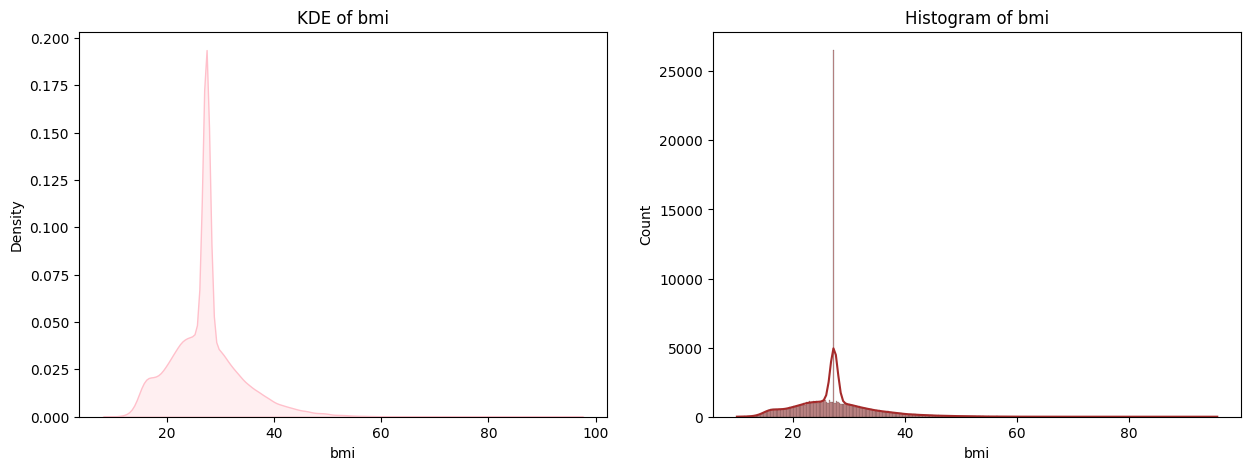

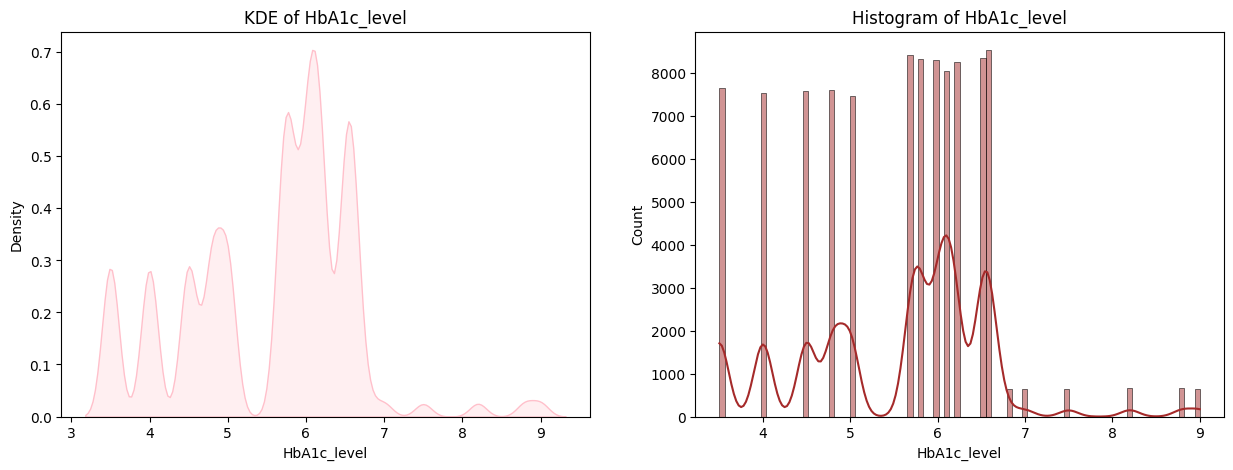

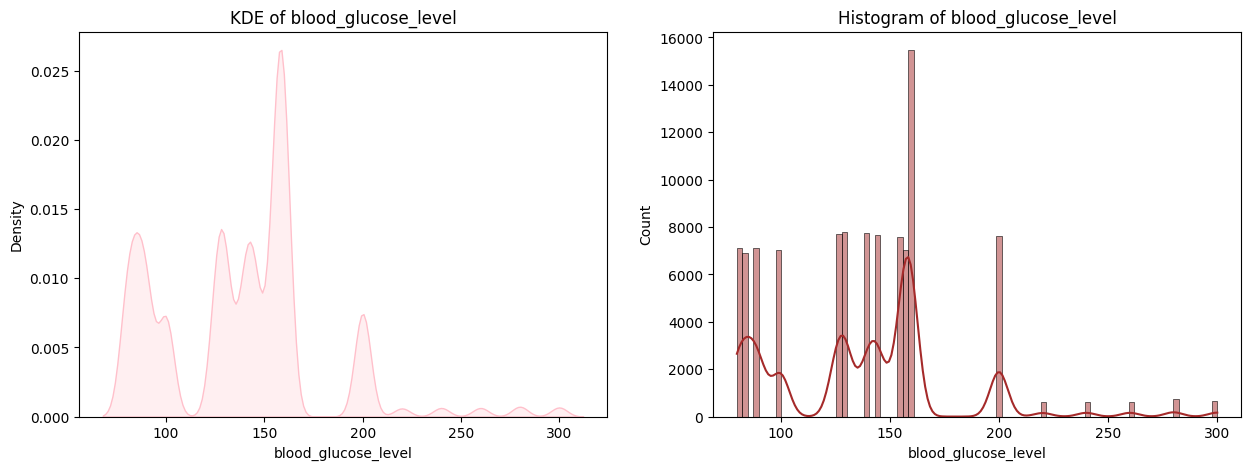

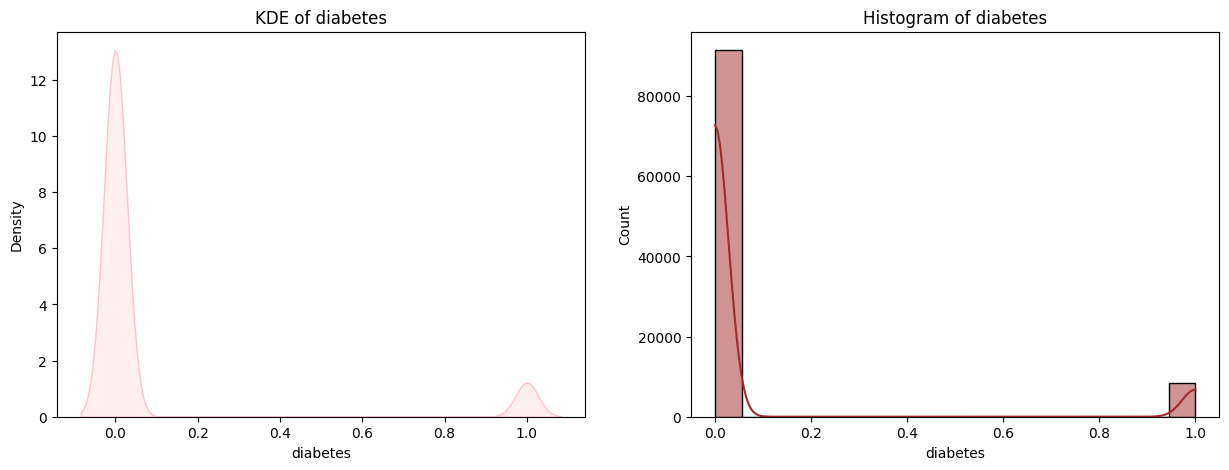

In [ ]:
numerical_cols = df.select_dtypes(include=['int','float'])

for col in numerical_cols:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.kdeplot(x=df[col], ax=axs[0], fill=True, color="pink")
    axs[0].set_title(f"KDE of {col}")

    sns.histplot(df[col], kde=True, ax=axs[1], color='brown')
    axs[1].set_title(f"Histogram of {col}")
    plt.show()

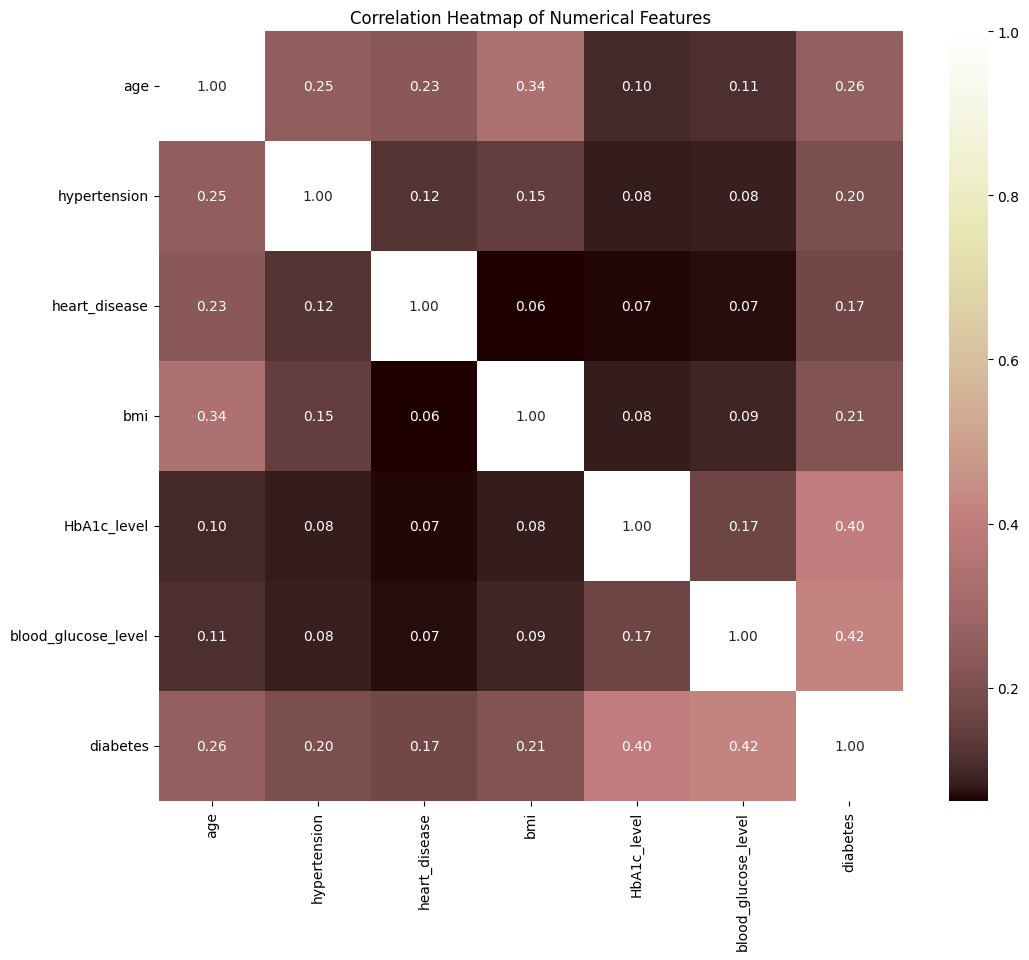

In [ ]:
# Heatmap of features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='pink', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# We use HbA1c_level as the dependent variable (target)
X = df.drop(columns=['HbA1c_level'])
y = df['HbA1c_level']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())

HbA1c_level
6.6    6765
5.7    6736
6.5    6712
5.8    6691
6.0    6620
6.2    6531
6.1    6465
3.5    6111
4.8    6105
4.5    6098
5.0    6037
4.0    6022
8.2     540
8.8     536
9.0     527
7.5     511
7.0     503
6.8     490
Name: count, dtype: int64
HbA1c_level
6.6    1775
6.2    1738
5.7    1677
6.0    1675
6.5    1650
5.8    1630
6.1    1583
3.5    1551
4.0    1520
4.8    1492
4.5    1487
5.0    1434
6.8     152
7.5     132
7.0     131
9.0     127
8.8     125
8.2     121
Name: count, dtype: int64


### **Data Preprocessing**

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
std_scaler = StandardScaler()
X_train_num = pd.DataFrame(
    std_scaler.fit_transform(X_train[numerical_cols]),
    columns=numerical_cols,
    index=X_train.index
)

X_test_num = pd.DataFrame(
    std_scaler.transform(X_test[numerical_cols]),
    columns=numerical_cols,
    index=X_test.index
)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_cat = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

### **Model Training**

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train_final, y_train)
y_pred = reg_model.predict(X_test_final)



In [ ]:
X_full = pd.concat([X_train_final, X_test_final])
y_full = pd.concat([y_train, y_test])

cv_predictions = cross_val_predict(reg_model, X_full, y_full, cv=5)

### **Model Evaluation**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
Ar2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_final.shape[1] - 1)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean-Squared Error: {mse:.3f}")
print(f"Root Mean-Squared Error: {rmse:.3f}")
print(f"R-squared Score: {r2:.3f}")
print(f"Adjusted R-squared Score: {Ar2:.3f}")


Model Evaluation:
Mean Absolute Error: 0.866
Mean-Squared Error: 0.967
Root Mean-Squared Error: 0.983
R-squared Score: 0.156
Adjusted R-squared Score: 0.156


In [ ]:
# Model Evaluation on Cross-Validation Prediction
print("Cross-Validated MSE:", mean_squared_error(y_full, cv_predictions))
print("Cross-Validated R²:", r2_score(y_full, cv_predictions))

Cross-Validated MSE: 0.9625228100949631
Cross-Validated R²: 0.1603420423432863


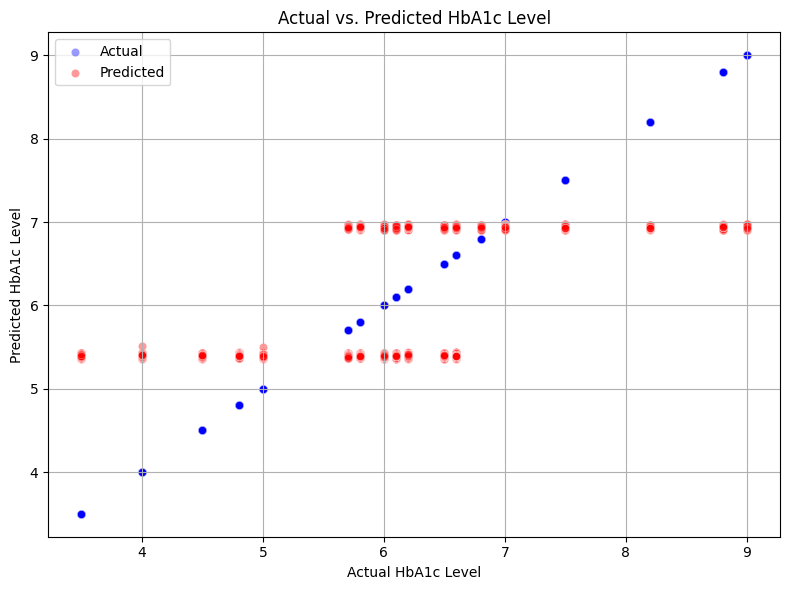

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
# Plot actual values in blue (on x-axis)
sns.scatterplot(x=y_test, y=y_test, color=colors[0], label='Actual', alpha=0.4)
# Plot predicted values in red (on y-axis)
sns.scatterplot(x=y_test, y=y_pred, color=colors[1], label='Predicted', alpha=0.4)
plt.xlabel("Actual HbA1c Level")
plt.ylabel("Predicted HbA1c Level")
plt.title("Actual vs. Predicted HbA1c Level")
plt.grid(True)
plt.legend()  # Show the legend
plt.tight_layout()
plt.show()

Many predictions (red dots) cluster at certain values (~5.5, ~7), and don't vary much, but actual values (blue dots) spread more widely across the range. This horizontal clustering means that the model tends to predict "average" values rather than capturing extreme high or low HbA1c values → classic sign of underfitting.

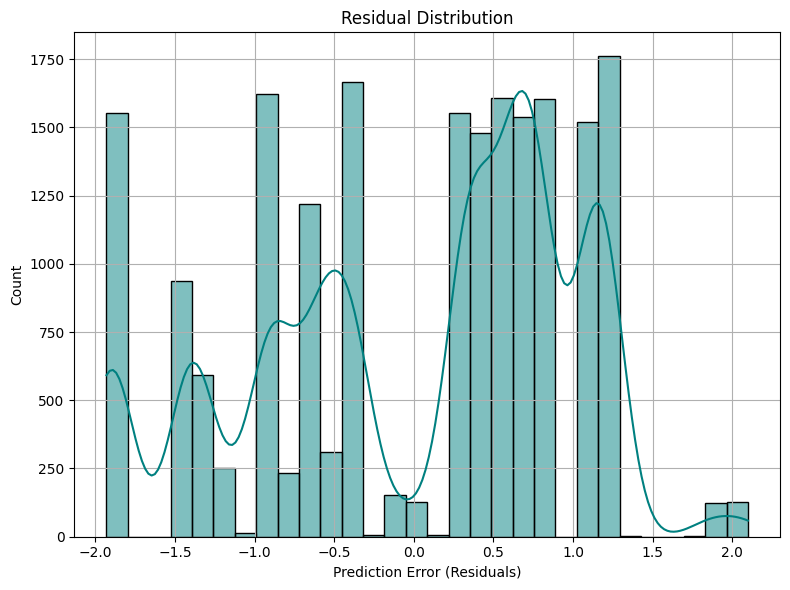

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.grid(True)
plt.tight_layout()
plt.show()

 There are multiple spikes and gaps and the distribution is not smooth or bell-shaped which suggests some model underfitting. This is expected because linear regression may struggle with complex or discrete HbA1c patterns.

In [ ]:
# Coefficients Table
coeff_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': reg_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Influential Features:")
print(coeff_df.head(10))


Top 10 Influential Features:
                        Feature  Coefficient
5                      diabetes     0.432180
7                  gender_Other     0.119811
8       smoking_history_current    -0.015660
12  smoking_history_not current     0.014547
6                   gender_Male     0.009259
1                  hypertension     0.005746
4           blood_glucose_level    -0.004222
0                           age    -0.003906
10       smoking_history_former     0.003280
11        smoking_history_never     0.002800


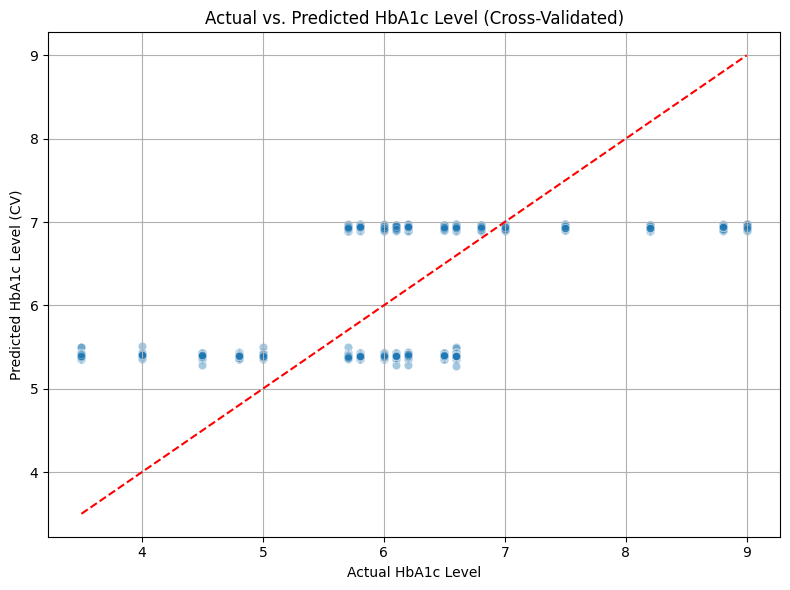

In [ ]:
# Actual vs. Predicted HbA1c (Cross-Validated)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_full, y=cv_predictions, alpha=0.4)
plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], 'r--')  # Reference line
plt.xlabel("Actual HbA1c Level")
plt.ylabel("Predicted HbA1c Level (CV)")
plt.title("Actual vs. Predicted HbA1c Level (Cross-Validated)")
plt.grid(True)
plt.tight_layout()
plt.show()

Predictions are still clustered (especially around 5.5 and 7.0) instead of following the red reference line smoothly. This reinforces that the model underpredicts high HbA1c and overpredicts low HbA1c, which biases toward the center. The cross-validation confirms the same underfitting behavior as before.

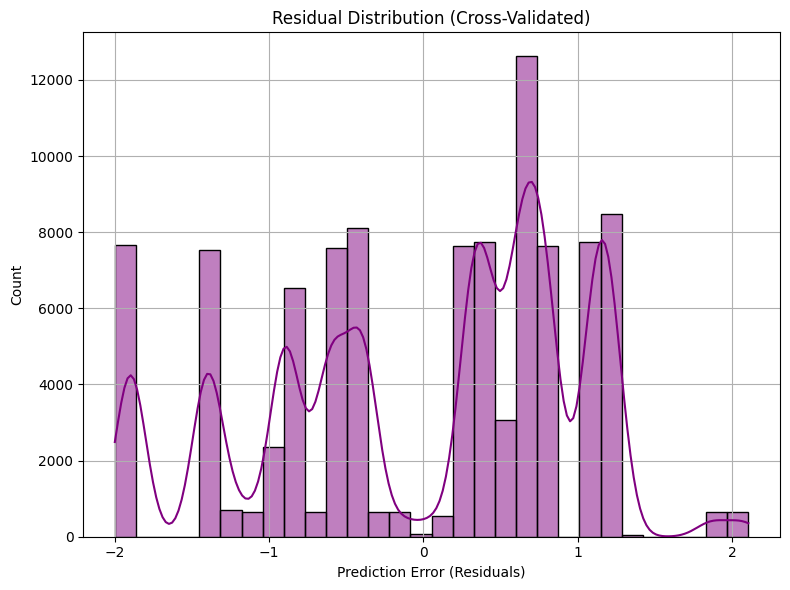

In [ ]:
# Residual Distribution Plot
cv_residuals = y_full - cv_predictions
plt.figure(figsize=(8, 6))
sns.histplot(cv_residuals, bins=30, kde=True, color='purple')
plt.title("Residual Distribution (Cross-Validated)")
plt.xlabel("Prediction Error (Residuals)")
plt.grid(True)
plt.tight_layout()
plt.show()

The shape looks similar to the first residual plot. Again, residuals are not smooth and show multiple peaks and valleys, rather than a clean normal bell curve. This shows that even after cross-validation, the model still struggles to perfectly fit the data.

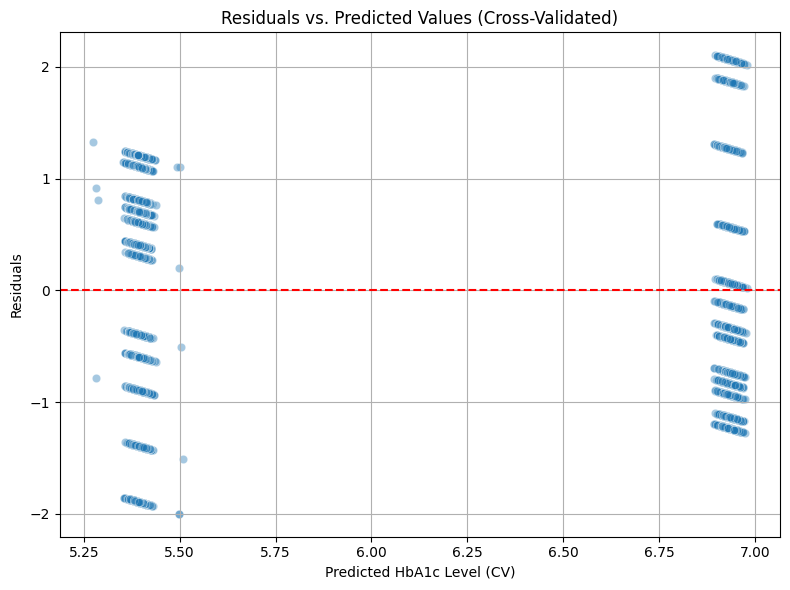

In [ ]:
# Residuals vs. Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=cv_predictions, y=cv_residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted HbA1c Level (CV)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Cross-Validated)")
plt.grid(True)
plt.tight_layout()
plt.show()

This is a classic sign of non-linearity: the real relationship between predictors and HbA1c may not be perfectly linear, but curved.



### **Correlation Analysis**

To verify our evaluation of the model's performance, we use the correlation procedure to find any significance between our target variable, HbA1c (hemoglobin levels), and the independent variables. Through the use of the t-test, we are able to verify whether or not a relationship exists by looking at p-values less than 0.01. The next statistic to look correlation coefficients(r) near -1 or +1 to measure the strength of each relationship. Diabetes has the largest r-value compared to the other independent variables.

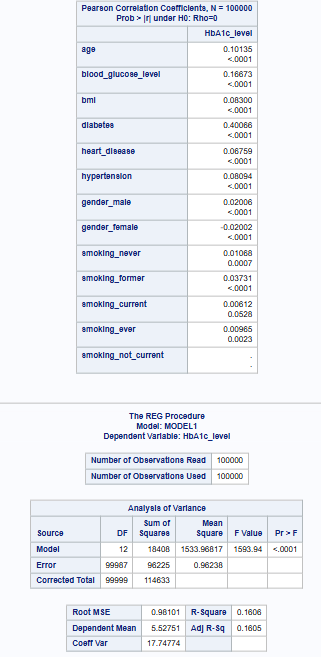

### **Check for Multicollinearity**

Multicollinearity is the intercorrrelations of two or more independent variables where moderate or high correlation occurs. There are four different methods to check for multicollinearity:


1.   Significant correlations between independent variables within the model
2.   Insignificant t-tests for the $\beta$ parameters while the F-test for model adequacy is significant
3.   Opposite signs (from what's expected) in the estimated parameters
4.   A variance inflation factor (VIF) greater than 10

Both variables of gender have the highest VIF out of all the other independent variables which indicates multicollinearity. We remove these variables from our model before continuing our analysis.


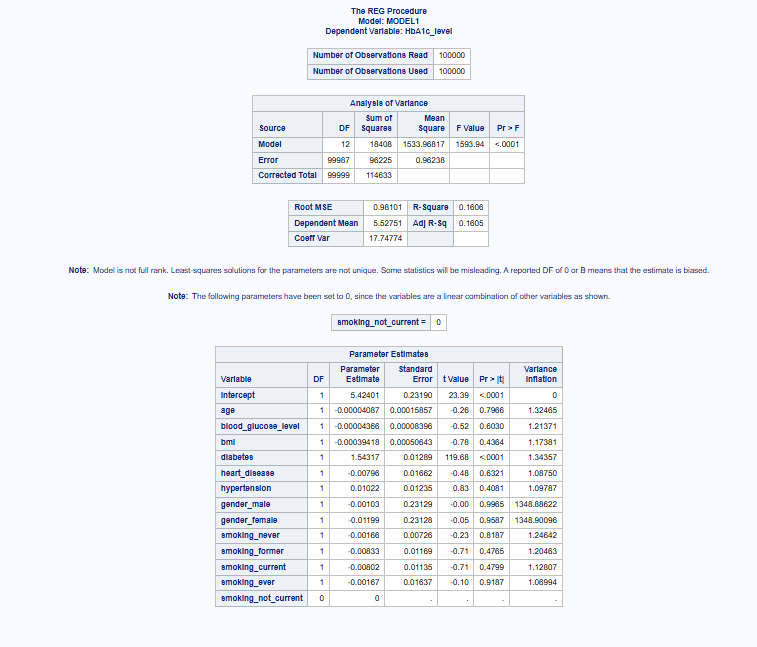

The next step is to use variable selection methods for our predictive model. This includes forward, backward, and stepwise selection methods. These techniques are used to find the best model to predict HbA1c (hemoglobin levels).

### **Forward Selection**

The forward selection method puts variables in one at a time but doesn't go back and recheck the t-values that have entered the model.

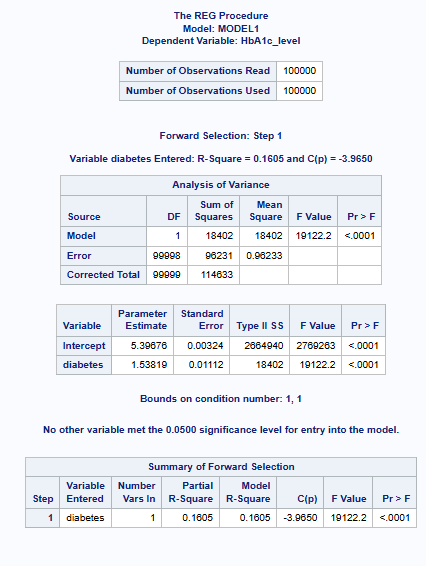

### **Backward Selection**

The backward selection starts with all the variables and then start eliminating based on the smallest t-statistic.
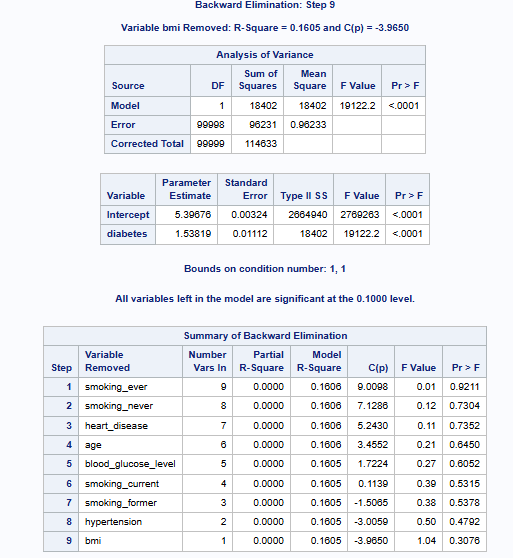

### **Stepwise Selection**

Stepwise selection method:


1.   Identify response variable (y) and the set of independent variables

2.   Fit all possible one-variable models

3.   Search through the remaining (k-1) independent variables for the best two variable model

4.   Continue to add variables to determine the best n variable model


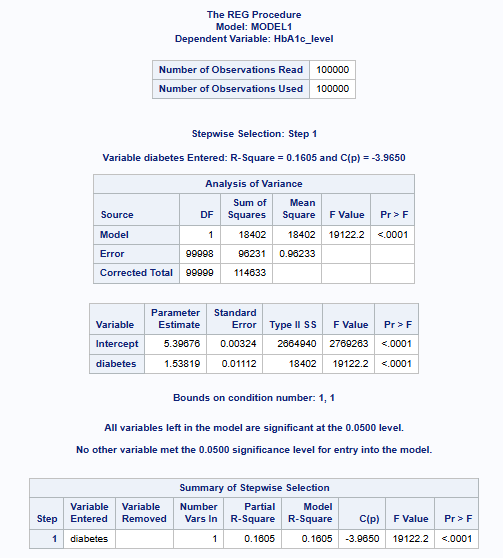

### **Results**

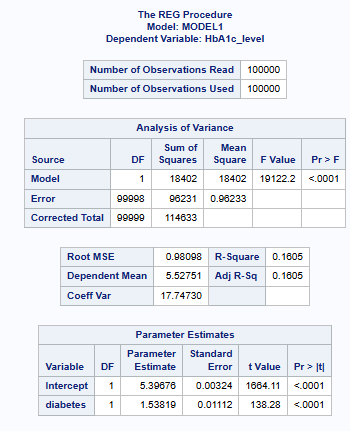

After applying each variable selection method. The main statistics we focus on are the lowest Mallow's criterion $(C_p)$, highest R-Square value (closest to 1), RMSE (closest to 0), and $R^2_{adj}$ (closest to 1). In our case, the model given by all three methods is:

$HbA1c = 5.39676 + 1.52819(diabetes)$

with $(C_p)$ = -3.9650, R-square = 0.1605, RMSE = 0.98098, and $R^2_{adj}$ = 0.1605.

- $β_0$: Baseline HbA1c for non-diabetics

- $β_1$: Expected change in HbA1c when diabetes is present or not (0 or 1)

This shows that diabetics have around a 1.5% increase in HbA1c(hemoglobin levels) on average. This also means that diabetes has a strong relationship with hemoglobin levels making the other independent variables negligible. Since this multiple regression approach only worked well for a single model, we will try to interpret a different model by using logistic regression to now predict diabetes.


##Logistic Regression##

To predict diabetes status, we first separated the independent variables (features) from the dependent variable (target). We dropped the diabetes column from the dataset to create X_log (predictors) and kept y_log as the diabetes outcome (0 for non-diabetic, 1 for diabetic).

In [ ]:
X_log = df.drop('diabetes', axis=1)
y_log = df['diabetes']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
print(y_train_log.value_counts())
print(y_test_log.value_counts())

diabetes
0    73208
1     6792
Name: count, dtype: int64
diabetes
0    18292
1     1708
Name: count, dtype: int64


We split the data into training (80%) and testing (20%) sets using train_test_split. Stratification was maintained to ensure that both sets reflected the original class distribution. As observed, the data is highly imbalanced, with the majority of patients (over 90%) being non-diabetic. Handling class imbalance carefully is important to avoid biased model performance.



Categorical variables, such as gender and smoking history, were encoded using One-Hot Encoding. To prevent multicollinearity, one category was dropped automatically. For numerical variables like age, BMI, and blood glucose level, we applied standardization using StandardScaler, which transforms variables to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model.

In [ ]:
cat_cols = X_train_log.select_dtypes(include=['object']).columns

X_train_c = X_train_log[cat_cols]
X_test_c = X_test_log[cat_cols]

encode = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encode.fit(X_train_c)

X_train_enc = encode.transform(X_train_c)
X_test_enc = encode.transform(X_test_c)

X_train_enc = pd.DataFrame(X_train_enc, columns=encode.get_feature_names_out(cat_cols),index=X_train_c.index)
X_test_enc = pd.DataFrame(X_test_enc, columns=encode.get_feature_names_out(cat_cols),index=X_test_c.index)

X_train_n = X_train_log.drop(columns=cat_cols)
X_test_n = X_test_log.drop(columns=cat_cols)

X_train_log = pd.concat([X_train_n,X_train_enc],axis=1)
X_test_log = pd.concat([X_test_n,X_test_enc],axis=1)

X_train_log.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,73.0,0,0,24.77,3.5,80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48955,80.0,0,0,24.60,5.7,145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44966,38.0,0,0,24.33,4.0,158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13568,26.0,0,0,18.87,5.0,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92727,61.0,1,0,22.11,4.5,85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
scale = StandardScaler()

X_train_log_scaled = scale.fit_transform(X_train_log)


X_test_log_scaled = scale.transform(X_test_log)


X_train_log = pd.DataFrame(X_train_log_scaled, columns=X_train_log.columns, index=X_train_log.index)


X_test_log = pd.DataFrame(X_test_log_scaled, columns = X_test_log.columns, index=X_test_log.index)

X_train_log

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,1.378720,-0.286309,-0.203559,-0.386474,-1.892451,-1.425157,-1.186854,1.187343,-0.014144,-0.747296,-0.318858,-0.204191,3.106841,-0.73511,-0.262931
48955,1.689866,-0.286309,-0.203559,-0.412172,0.162169,0.170591,-1.186854,1.187343,-0.014144,-0.747296,-0.318858,-0.204191,-0.321870,1.36034,-0.262931
44966,-0.177011,-0.286309,-0.203559,-0.452986,-1.425492,0.489740,0.842563,-0.842217,-0.014144,-0.747296,-0.318858,4.897386,-0.321870,-0.73511,-0.262931
13568,-0.710404,-0.286309,-0.203559,-1.278339,-0.491574,-0.934157,0.842563,-0.842217,-0.014144,-0.747296,-0.318858,-0.204191,-0.321870,-0.73511,3.803277
92727,0.845326,3.492727,-0.203559,-0.788570,-0.958533,-1.302407,0.842563,-0.842217,-0.014144,-0.747296,3.136193,-0.204191,-0.321870,-0.73511,-0.262931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.311933,-0.286309,-0.203559,0.854578,0.162169,-1.425157,-1.186854,1.187343,-0.014144,-0.747296,-0.318858,-0.204191,-0.321870,1.36034,-0.262931
54886,-1.199348,-0.286309,-0.203559,0.116900,-0.491574,0.514290,0.842563,-0.842217,-0.014144,-0.747296,-0.318858,-0.204191,-0.321870,1.36034,-0.262931
76820,0.000787,-0.286309,-0.203559,-0.179380,0.255561,-1.302407,-1.186854,1.187343,-0.014144,-0.747296,-0.318858,-0.204191,-0.321870,1.36034,-0.262931
860,-0.221460,-0.286309,-0.203559,-0.357753,0.629128,0.489740,0.842563,-0.842217,-0.014144,-0.747296,-0.318858,-0.204191,-0.321870,1.36034,-0.262931


We trained a Logistic Regression model with C=1 (default regularization strength) and class_weight='balanced'. The balanced setting compensates for the imbalance in the dataset by assigning higher weight to the minority class (diabetic cases), making the model more sensitive to detecting diabetes.

In [ ]:
lr_model = LogisticRegression(C=1, class_weight='balanced')

lr_model.fit(X_train_log_scaled, y_train_log)

y_pred_log = lr_model.predict(X_test_log_scaled)

y_prob_log = lr_model.predict_proba(X_test_log)[:, 1]

print(y_pred_log)


[0 0 0 ... 0 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


After training, the model was used to predict diabetes status on the test set. We evaluated its performance using a confusion matrix, which compared predicted labels to actual labels. The confusion matrix was:

Accuracy: 0.890
Precision: 0.429
Recall: 0.883
F1 Score: 0.578


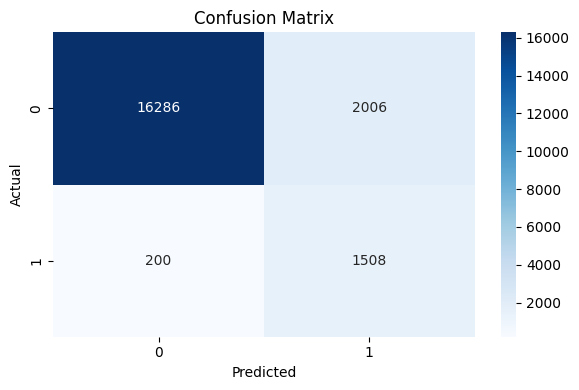

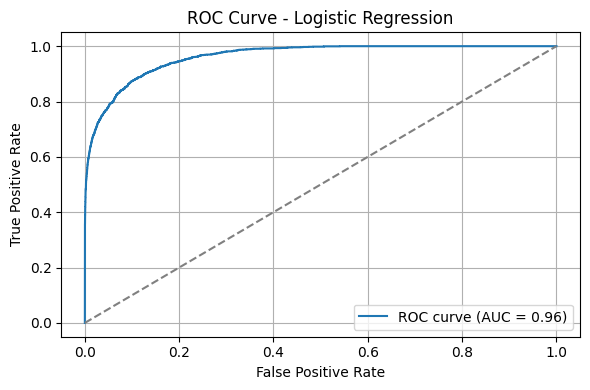

In [ ]:
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
acc = accuracy_score(y_test_log, y_pred_log)
prec = precision_score(y_test_log, y_pred_log)
rec = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_log, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


This means the model correctly predicted 16,286 non-diabetic patients and 1,508 diabetic patients. However, it also misclassified 2,006 diabetics as non-diabetics and incorrectly flagged 200 non-diabetics as diabetic.

As a result, the logistic regression model achieved an overall accuracy of 89.0%, correctly classifying most patients. Although the precision was 42.9%, reflecting some false positives, the model achieved a high recall of 88.3%, meaning it successfully identified the majority of diabetic patients, which is an important outcome for early diagnosis. The F1 score of 57.8% indicates a reasonable balance between precision and recall. Additionally, the model demonstrated excellent discrimination ability, with an AUC of 0.96 on the ROC curve, confirming its strong capacity to separate diabetic from non-diabetic cases. Overall, the model prioritizes catching as many diabetic cases as possible, which is ideal for clinical screening purposes.

### **Conclusion**

The main goal of this project was to find relationships between various health variables to help predict diabetes. We used Multiple Linear Regression to predict HbA1c (hemoglobin levels) and found diabetes to have the only strong linear relationship with HbA1c. Knowing this, we wanted to further our analysis by using Logistic Regression to predict the presence of diabetes, based on the probability of each instance, with other independent variables. The insights gained from predicting HbA1c helped with the predictions of diabetes risk. By using both statistical and machine learning techniques, we were able to find and evaluate the potential factors/probabilities for each health feature.

### **References**

Kaggle Dataset: https://www.kaggle.com/datasets/dat00700/diabetes-prediction-dataset/data

Textbooks:

- Second Course in Statistics, 8th ed., by William Mendenhall and Terry Sincich

- Hands-On Machine Learning with Scikit Learn and tensorflow by Aurilien Geron